# BIZ 프로젝트 : 부실기업 예측

## Step2 : 데이터 전처리

부실기업은 과거 3년간 연속해 이자보상 배율이 1.0미만인 기업을 의미하며  
이를 이용하여 타겟변수인 부실기업여부 변수를 생성

### 필요라이브러리 불러오기

In [28]:
import pandas as pd
import numpy as np

### 데이터 불러오기

In [29]:
RANDOM_STATE = 110

data = pd.read_csv("../../project/data/clean_financial_data.csv", encoding='utf-8-sig', low_memory=False)
print(data.shape)

(38639, 543)


In [30]:
data.columns

Index(['업체코드', '종목코드', '종목명', '2020/총자산증가율', '2021/총자산증가율', '2022/총자산증가율',
       '2023/총자산증가율', '2024/총자산증가율', '2020/유형자산증가율', '2021/유형자산증가율',
       ...
       '2020/조세공과(구성비)', '2021/조세공과(구성비)', '2022/조세공과(구성비)', '2023/조세공과(구성비)',
       '2024/조세공과(구성비)', '2020/감가상각비(구성비)', '2021/감가상각비(구성비)',
       '2022/감가상각비(구성비)', '2023/감가상각비(구성비)', '2024/감가상각비(구성비)'],
      dtype='object', length=543)

In [31]:
# '영업이익이자보상비율'이 포함된 열들 찾기
columns_with_ratio = [col for col in data.columns if '영업이익이자보상비율' in col]

# 각 열에 대해 결측치 개수와 비율 계산
missing_data = data[columns_with_ratio].isnull().sum()
missing_ratio = (missing_data / len(data)) * 100  # 결측치 비율 계산 (퍼센트)

# 결측치가 있는 열만 출력
missing_summary = pd.DataFrame({
    '결측치 개수': missing_data,
    '결측치 비율 (%)': missing_ratio
}).loc[missing_data > 0]

# 결과 출력
print(missing_summary)


                 결측치 개수  결측치 비율 (%)
2020/영업이익이자보상비율    8768   22.692099
2021/영업이익이자보상비율    6378   16.506638
2022/영업이익이자보상비율    4472   11.573798
2023/영업이익이자보상비율    4810   12.448562
2024/영업이익이자보상비율   37943   98.198711


- 2024년 데이터는 target변수인 '영업이익이자보상비율'의 대부분이 결측치이므로 제거

In [32]:
# '2024'가 열 이름에 포함된 열들을 제거
data = data.drop(columns=[col for col in data.columns if '2024' in col], errors='ignore')
print(data.shape)

(38639, 435)


In [33]:
# '영업이익이자보상비율'이 포함된 열들 찾기
columns_with_ratio = [col for col in data.columns if '영업이익이자보상비율' in col]

# 결측치가 있는 행 제거
data = data.dropna(subset=columns_with_ratio)

# 결과 확인
print(data.shape)

(27604, 435)


In [34]:
# 각 열의 결측값을 중앙값으로 대체
data = data.fillna(data.median(numeric_only=True))

In [35]:
data.dtypes

업체코드                object
종목코드                object
종목명                 object
2020/총자산증가율        float64
2021/총자산증가율        float64
                    ...   
2023/조세공과(구성비)     float64
2020/감가상각비(구성비)    float64
2021/감가상각비(구성비)    float64
2022/감가상각비(구성비)    float64
2023/감가상각비(구성비)    float64
Length: 435, dtype: object

In [36]:
# 숫자형 변수 개수 확인
numeric_columns = data.select_dtypes(include=['number']).columns
numeric_count = len(numeric_columns)

print(f"숫자형 변수 개수: {numeric_count}개")

숫자형 변수 개수: 432개


In [37]:
import matplotlib.pyplot as plt
from matplotlib import rc
import platform

# 운영 체제에 따라 폰트 설정
if platform.system() == 'Windows':  # Windows 환경
    rc('font', family='Malgun Gothic')  # 맑은 고딕

# 음수 표시 가능하도록 설정
plt.rcParams['axes.unicode_minus'] = False


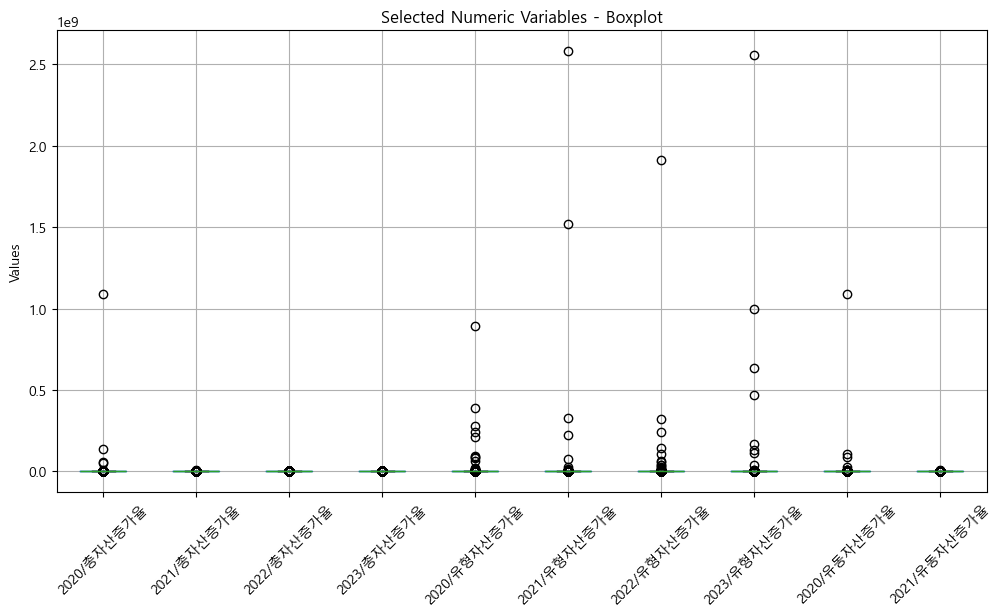

In [38]:
import matplotlib.pyplot as plt

# 숫자형 변수 선택
numeric_columns = data.select_dtypes(include=['number']).columns

# 숫자형 변수 중 일부 선택 (예: 앞에서 10개)
selected_columns = numeric_columns[:10]

# 선택된 변수에 대한 박스플롯 그리기
plt.figure(figsize=(12, 6))
data[selected_columns].boxplot(rot=45)
plt.title("Selected Numeric Variables - Boxplot")
plt.ylabel("Values")
plt.show()


In [39]:
from scipy.stats.mstats import winsorize

# 숫자형 데이터에만 윈저라이징 적용
numeric_columns = data.select_dtypes(include=['number']).columns

for col in numeric_columns:
    # 0.01 이하와 0.99 이상을 해당 값으로 제한
    lower_limit = data[col].quantile(0.01)
    upper_limit = data[col].quantile(0.99)
    data[col] = data[col].clip(lower=lower_limit, upper=upper_limit)


data.head(5)


,업체코드,종목코드,종목명,2020/총자산증가율,2021/총자산증가율,2022/총자산증가율,2023/총자산증가율,2020/유형자산증가율,2021/유형자산증가율,2022/유형자산증가율,...,2022/임차료(구성비),2023/임차료(구성비),2020/조세공과(구성비),2021/조세공과(구성비),2022/조세공과(구성비),2023/조세공과(구성비),2020/감가상각비(구성비),2021/감가상각비(구성비),2022/감가상각비(구성비),2023/감가상각비(구성비)
0,N350605,A000020,동화약품,7.57,2.70,3.27,10.23,19.67,10.41,7.64,...,1.32,1.41,2.14,2.11,2.12,2.13,7.96,7.83,8.03,8.22
1,N320498,A000040,KR모터스,-36.76,1.45,-0.52,-4.89,-0.29,5.78,4.85,...,1.32,1.41,2.14,2.11,2.12,2.13,7.96,7.83,8.03,8.22
2,N320684,A000050,경방,-6.47,0.15,-6.09,-1.40,-36.42,-23.56,665.18,...,1.32,1.41,2.14,2.11,2.12,2.13,7.96,7.83,8.03,8.22
3,N320730,A000070,삼양홀딩스,6.31,22.28,-0.76,17.63,-45.53,943.89,0.68,...,1.32,1.41,2.14,2.11,2.12,2.13,7.96,7.83,8.03,8.22
4,N310581,A000080,하이트진로,-0.99,10.65,-9.43,-0.03,-6.75,-2.60,-1.51,...,1.32,1.41,2.14,2.11,2.12,2.13,7.96,7.83,8.03,8.22


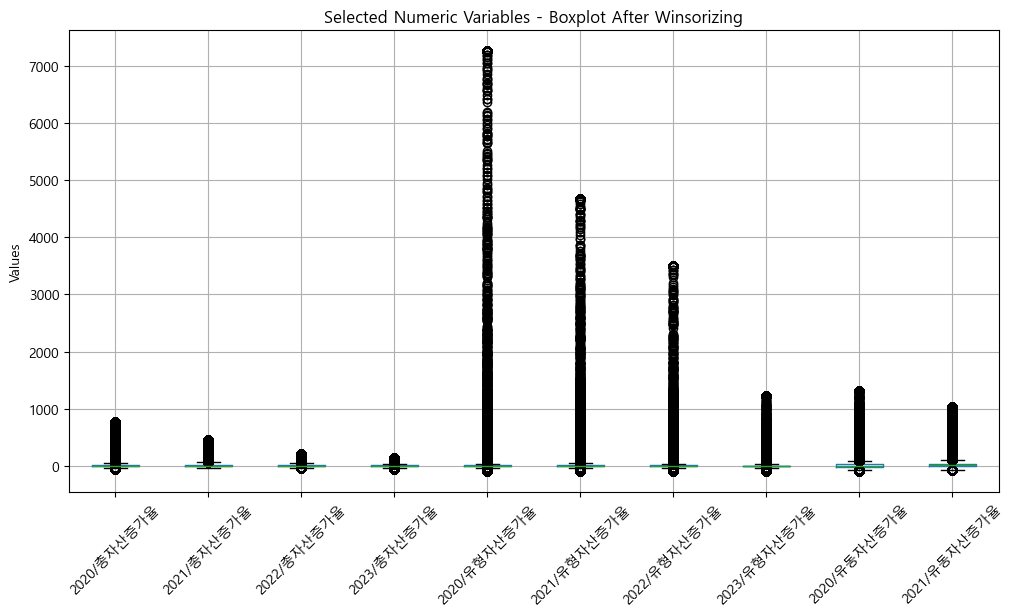

In [40]:
import matplotlib.pyplot as plt

selected_columns = numeric_columns[:10]  # 이전에 선택한 numeric_columns 그대로 사용

# 윈저라이징 후 선택된 변수에 대한 박스플롯 그리기
plt.figure(figsize=(12, 6))
data[selected_columns].boxplot(rot=45)
plt.title("Selected Numeric Variables - Boxplot After Winsorizing")
plt.ylabel("Values")
plt.show()


c:\Users\ldb76\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\ldb76\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


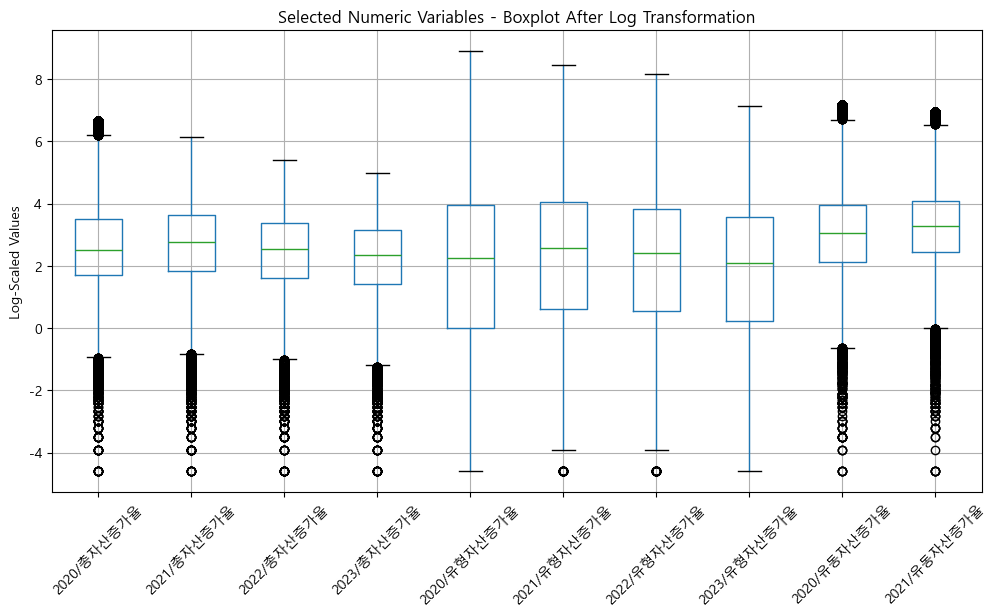

In [41]:
import numpy as np

# 로그 변환
data_log_scaled = data[selected_columns].apply(lambda x: np.log1p(x))

# 로그 변환 후 박스플롯
plt.figure(figsize=(12, 6))
data_log_scaled.boxplot(rot=45)
plt.title("Selected Numeric Variables - Boxplot After Log Transformation")
plt.ylabel("Log-Scaled Values")
plt.show()


In [42]:
data['2021/영업이익이자보상비율'] < 1

0        False
1         True
2        False
3        False
4        False
         ...  
38634     True
38635    False
38636    False
38637    False
38638    False
Name: 2021/영업이익이자보상비율, Length: 27604, dtype: bool

- 0이면 부실기업이 아닌 기업, 1이면 부실기업을 의미

In [43]:
# 2023/부실기업 변수 생성 및 값 할당
data['2023/부실기업'] = ((data['2021/영업이익이자보상비율'] < 1) & 
                        (data['2022/영업이익이자보상비율'] < 1) & 
                        (data['2023/영업이익이자보상비율'] < 1)).astype(int)

print("\n2023/부실기업 변수 값:")
print(data['2023/부실기업'].value_counts())


2023/부실기업 변수 값:
2023/부실기업
0    22473
1     5131
Name: count, dtype: int64


C:\Users\ldb76\AppData\Local\Temp\ipykernel_14892\799345054.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['2023/부실기업'] = ((data['2021/영업이익이자보상비율'] < 1) &


In [44]:
data.isnull().sum()

업체코드                   0
종목코드               24402
종목명                    1
2020/총자산증가율            0
2021/총자산증가율            0
                   ...  
2020/감가상각비(구성비)        0
2021/감가상각비(구성비)        0
2022/감가상각비(구성비)        0
2023/감가상각비(구성비)        0
2023/부실기업              0
Length: 436, dtype: int64

In [45]:
# '종목명' 열에서 null 값이 있는 행 제거
data = data[data['종목명'].notnull()]

이때 종목코드 x -> 해당 기업이 상장되지 않은 경우

In [46]:
# '종목코드' 열의 값이 있으면 1, 없으면 0을 부여하는 새로운 열 생성
data['상장여부'] = data['종목코드'].notnull().astype(int)

# '종목코드' 열 제거
data = data.drop(columns=['종목코드'])

C:\Users\ldb76\AppData\Local\Temp\ipykernel_14892\292392295.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['상장여부'] = data['종목코드'].notnull().astype(int)


In [47]:
data.isnull().sum()

업체코드               0
종목명                0
2020/총자산증가율        0
2021/총자산증가율        0
2022/총자산증가율        0
                  ..
2021/감가상각비(구성비)    0
2022/감가상각비(구성비)    0
2023/감가상각비(구성비)    0
2023/부실기업          0
상장여부               0
Length: 436, dtype: int64

In [48]:
data.dtypes

업체코드                object
종목명                 object
2020/총자산증가율        float64
2021/총자산증가율        float64
2022/총자산증가율        float64
                    ...   
2021/감가상각비(구성비)    float64
2022/감가상각비(구성비)    float64
2023/감가상각비(구성비)    float64
2023/부실기업            int32
상장여부                 int32
Length: 436, dtype: object

21~23년도 데이터 선택

In [49]:
import pandas as pd

# 21~23년도 데이터만을 사용하기 위해 해당 연도가 포함된 열 필터링
years = ['2021', '2022', '2023']
cols_to_keep = ['업체코드', '종목명','상장여부'] + [col for col in data.columns if any(year in col for year in years)]

# 필터링된 열들로 새로운 데이터프레임 생성
data = data[cols_to_keep]

# 결과 확인
print("필터링된 데이터프레임의 열들:")
print(data.columns)

필터링된 데이터프레임의 열들:
Index(['업체코드', '종목명', '상장여부', '2021/총자산증가율', '2022/총자산증가율', '2023/총자산증가율',
       '2021/유형자산증가율', '2022/유형자산증가율', '2023/유형자산증가율', '2021/유동자산증가율',
       ...
       '2021/임차료(구성비)', '2022/임차료(구성비)', '2023/임차료(구성비)', '2021/조세공과(구성비)',
       '2022/조세공과(구성비)', '2023/조세공과(구성비)', '2021/감가상각비(구성비)',
       '2022/감가상각비(구성비)', '2023/감가상각비(구성비)', '2023/부실기업'],
      dtype='object', length=328)


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27603 entries, 0 to 38638
Columns: 328 entries, 업체코드 to 2023/부실기업
dtypes: float64(324), int32(2), object(2)
memory usage: 69.1+ MB


### t-test

In [51]:
from scipy.stats import ttest_ind

# 타겟 변수 설정
group_0 = data[data['2023/부실기업'] == 0]  # 부실기업이 아닌 그룹
group_1 = data[data['2023/부실기업'] == 1]  # 부실기업 그룹

# 숫자형 변수 선택 및 제외할 열들 제거
numeric_columns = data.select_dtypes(include=['number']).columns.drop('2023/부실기업')

# t-검정 결과 저장
t_test_results = []

for col in numeric_columns:
    # 각 변수에 대해 t-검정 수행
    t_stat, p_value = ttest_ind(group_0[col].dropna(), group_1[col].dropna(), equal_var=False)  # Welch's t-test
    t_test_results.append({'변수': col, 't-값': t_stat, 'p-값': p_value})

# t-검정 결과를 데이터프레임으로 정리
t_test_df = pd.DataFrame(t_test_results)

# 유의미한 변수 필터링 (p-값 < 0.05)
significant_vars = t_test_df[t_test_df['p-값'] < 0.05]

# 결과 출력
print("t-검정 결과 요약:")
print(t_test_df[t_test_df['p-값'] > 0.05].sort_values(by='p-값', ascending=False).head(10))  # p-값 기준 상위 10개 출력
print("제거되는 변수의 갯수: ", len(t_test_df[t_test_df['p-값'] > 0.05]))
print("\n유의미한 변수들:")
print(significant_vars)

t-검정 결과 요약:
                 변수       t-값       p-값
99    2023/차입금평균이자율 -0.006439  0.994863
86   2022/인건비/총비용비율  0.133861  0.893515
4      2021/유형자산증가율 -0.281332  0.778463
9      2023/유동자산증가율 -0.366221  0.714212
28     2021/종업원수증가율  0.368283  0.712674
243    2023/유형자산회전율 -0.485006  0.627687
258    2023/매출채권회전율 -0.653761  0.513286
257    2022/매출채권회전율  1.052563  0.292573
8      2022/유동자산증가율 -1.175761  0.239736
10     2021/재고자산증가율  1.210586  0.226094
제거되는 변수의 갯수:  16

유의미한 변수들:
                  변수        t-값           p-값
0               상장여부  -3.923307  8.814390e-05
1        2021/총자산증가율  -5.444239  5.405659e-08
2        2022/총자산증가율   6.429458  1.367696e-10
3        2023/총자산증가율  12.333330  1.343744e-34
6       2023/유형자산증가율   6.804193  1.082887e-11
..               ...        ...           ...
320   2022/조세공과(구성비)  -3.097531  1.959583e-03
321   2023/조세공과(구성비)  -4.225246  2.416841e-05
322  2021/감가상각비(구성비)  -4.141930  3.488085e-05
323  2022/감가상각비(구성비)  -4.588787  4.540407e-06
324  2023/감가상각

In [ ]:
# # 각 연도별 변수 선택
# vars_2021 = [col for col in numeric_columns if col.startswith('2021/')]
# vars_2022 = [col for col in numeric_columns if col.startswith('2022/')]
# vars_2023 = [col for col in numeric_columns if col.startswith('2023/')]

# # 연도별 변수 출력
# print("2021년도 변수들:")
# print(vars_2021)

# print("\n2022년도 변수들:")
# print(vars_2022)

# print("\n2023년도 변수들:")
# print(vars_2023)

# # 연도별 변수들을 사전으로 정리
# yearly_variables = {
#     '2021': vars_2021,
#     '2022': vars_2022,
#     '2023': vars_2023
# }

# # 데이터프레임으로 정리해서 보기 (선택 사항)
# import pandas as pd
# yearly_variables_df = pd.DataFrame(dict([(year, pd.Series(vars)) for year, vars in yearly_variables.items()]))
# print("\n연도별 변수 요약:")
# print(yearly_variables_df)


2021년도 변수들:
['2021/총자산증가율', '2021/유형자산증가율', '2021/유동자산증가율', '2021/재고자산증가율', '2021/자기자본증가율', '2021/매출액증가율', '2021/영업이익증가율', '2021/법인세비용차감전순이익증가율', '2021/순이익증가율', '2021/종업원수증가율', '2021/총자본영업이익율', '2021/총자본법인세비용차감전순이익율', '2021/총자본순이익율', '2021/기업법인세비용차감전순이익율', '2021/기업순이익율', '2021/경영자본영업이익율', '2021/자기자본법인세비용차감전순이익율', '2021/자기자본순이익율', '2021/자본금법인세비용차감전순이익율', '2021/자본금순이익율', '2021/매출액법인세비용차감전순이익율', '2021/매출액순이익율', '2021/매출액총이익율', '2021/매출액영업이익율', '2021/수지비율', '2021/매출원가율', '2021/감가상각율', '2021/감가상각비/총비용비율', '2021/인건비/총비용비율', '2021/조세/조세차감전순이익비율', '2021/조세공과/총비용비율', '2021/금융비용/총부채', '2021/차입금평균이자율', '2021/금융비용/총비용비율', '2021/금융비용/매출액비율', '2021/영업활동현금흐름이자보상비율', '2021/영업이익이자보상비율', '2021/법인세비용차감전순이익이자보상비율', '2021/법인세차감전순이익이자보상비율', '2021/배당율', '2021/배당성향', '2021/상환계수(세전이익)', '2021/부채상환계수', '2021/대출효율성계수(법인세비용차감전순이익)', '2021/EBIT대매출액(세전이익)', '2021/EBITDA대매출액', '2021/EBITDA대금융비용', '2021/자기자본비율', '2021/유동비율', '2021/당좌비율', '2021/현금비율', '2021/비유동자산비율', '2021/비유동자산장기적합율', '2021/부채비율', '2021/유동부채비율', '202

### 로지스틱 회귀분석 & 후진선택법

- 로지스틱 회귀분석에서 변수 검증 : 특정 독립변수가 유의미하게 종속변수와 연관되어 있는지 확인하고, 불필요한 변수를 제거

In [52]:
import statsmodels.api as sm

# '2023/부실기업'을 종속변수로 설정
y = data['2023/부실기업']

# 독립변수: t-test 후 유의한 변수들
X = data[significant_vars['변수']].select_dtypes(include=['number'])

# 상수항 추가
X = sm.add_constant(X)

In [53]:
def backward_elimination(X, y, significance_level=0.05):
    """
    후진 선택법을 이용한 변수 선택
    Args:
    - X: 독립변수 데이터프레임
    - y: 종속변수 시리즈
    - significance_level: 변수 제거 기준 p-value (기본값: 0.05)

    Returns:
    - 최종 모델
    - 선택된 변수 리스트
    """
    while True:
        model = sm.Logit(y, X).fit(disp=False)  # 로지스틱 회귀 모델 적합
        p_values = model.pvalues
        max_p_value = p_values.max()  # 가장 높은 p-value

        if max_p_value > significance_level:  # 기준보다 높은 변수 제거
            excluded_variable = p_values.idxmax()
            print(f"제거된 변수: {excluded_variable}, p-value: {max_p_value}")
            X = X.drop(columns=[excluded_variable])
        else:
            break

    return model, X.columns

In [59]:
# 후진 제거법 수행
final_model, selected_features = backward_elimination(X, y)

# 최종 결과 출력
print("\n선택된 변수들:")
print(selected_features)

# 최종 모델 요약
print("\n최종 모델 요약:")
print(final_model.summary())

c:\Users\ldb76\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


제거된 변수: 2022/법인세비용차감전순이익이자보상비율, p-value: 0.9999999999999991


c:\Users\ldb76\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


제거된 변수: 2023/법인세비용차감전순이익이자보상비율, p-value: 1.0


c:\Users\ldb76\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


제거된 변수: 2021/법인세비용차감전순이익이자보상비율, p-value: 0.9999999999999736


c:\Users\ldb76\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


제거된 변수: 2021/인건비(구성비), p-value: 0.9999999596353023


c:\Users\ldb76\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


제거된 변수: 2023/노동소득분배율, p-value: 0.9999999477602457


c:\Users\ldb76\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


제거된 변수: 2022/종업원수증가율, p-value: 0.9898196113366065


c:\Users\ldb76\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


제거된 변수: 2023/매출채권/매입채무비율, p-value: 0.989373787137279


c:\Users\ldb76\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


제거된 변수: 2022/인건비(구성비), p-value: 0.9999999941640183


c:\Users\ldb76\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


제거된 변수: const, p-value: 0.9869222488604391


c:\Users\ldb76\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


제거된 변수: 2022/영업이익증가율, p-value: 0.9843224332233684
제거된 변수: 2023/배당성향, p-value: 0.9622381325697386


c:\Users\ldb76\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


제거된 변수: 2023/적립금비율, p-value: 0.9555799895958424


c:\Users\ldb76\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


제거된 변수: 2021/부가가치(종업원1인당), p-value: 0.9509099440827729


c:\Users\ldb76\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


제거된 변수: 2022/매출채권/상,제품비율, p-value: 0.9490455255982008


c:\Users\ldb76\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


제거된 변수: 2023/재고자산회전율2, p-value: 0.9379259101306918
제거된 변수: 2021/순C/F대차입금비율, p-value: 0.9365327996730322


c:\Users\ldb76\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


제거된 변수: 2022/순이익증가율, p-value: 0.9350325442822258


c:\Users\ldb76\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


제거된 변수: 2023/순운전자본/총자본비율, p-value: 0.9342642469844409


c:\Users\ldb76\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


제거된 변수: 2023/종업원수증가율, p-value: 0.934471172404992


c:\Users\ldb76\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


제거된 변수: 2023/대출효율성계수(법인세비용차감전순이익), p-value: 0.9318920998881791


c:\Users\ldb76\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


제거된 변수: 2023/인건비(종업원1인당), p-value: 0.9268977854716127


c:\Users\ldb76\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


제거된 변수: 2023/기업법인세비용차감전순이익율, p-value: 0.9275081176135505


c:\Users\ldb76\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


제거된 변수: 2022/상(제)품회전율, p-value: 0.9120865131258218


c:\Users\ldb76\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


제거된 변수: 2021/자기자본법인세비용차감전순이익율, p-value: 0.9092890540189414


c:\Users\ldb76\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


제거된 변수: 2021/총C/F대총자본비율, p-value: 0.9093174630408911


c:\Users\ldb76\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


제거된 변수: 2021/순영업자본회전율, p-value: 0.9080655696545225


c:\Users\ldb76\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


제거된 변수: 2023/매입채무/재고자산비율, p-value: 0.8932601632080712
제거된 변수: 2021/비유동자산비율, p-value: 0.8905725548778064


c:\Users\ldb76\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


제거된 변수: 2022/비유동자산비율, p-value: 0.899643860416731


c:\Users\ldb76\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


제거된 변수: 2022/비유동부채비율, p-value: 0.914619278619766


c:\Users\ldb76\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


제거된 변수: 2023/조세/조세차감전순이익비율, p-value: 0.8782275296770384
제거된 변수: 2022/수지비율, p-value: 0.8778545032818844


c:\Users\ldb76\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


제거된 변수: 2021/비유동자산장기적합율, p-value: 0.8733332535313523


c:\Users\ldb76\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


제거된 변수: 2022/감가상각비(구성비), p-value: 0.871276558079557


c:\Users\ldb76\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


제거된 변수: 2022/법인세차감전순이익이자보상비율, p-value: 0.8601906887255365


c:\Users\ldb76\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


제거된 변수: 2021/매입채무회전율, p-value: 0.8385915237820216


c:\Users\ldb76\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


제거된 변수: 2023/순C/F대차입금비율, p-value: 0.8386197533094861


c:\Users\ldb76\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


제거된 변수: 2021/매출채권/매입채무비율, p-value: 0.8329857287136273


c:\Users\ldb76\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


제거된 변수: 2022/총자본투자효율, p-value: 0.8322207386764233


c:\Users\ldb76\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


제거된 변수: 2023/매출액순이익율, p-value: 0.8092090292086958


c:\Users\ldb76\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


제거된 변수: 2023/유보액/총자산비율, p-value: 0.8023364723482606


c:\Users\ldb76\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


제거된 변수: 2021/총자본순이익율, p-value: 0.7914510650489721


c:\Users\ldb76\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


제거된 변수: 2022/총C/F대차입금비율, p-value: 0.7925348242229954


c:\Users\ldb76\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


제거된 변수: 2023/법인세차감전순이익이자보상비율, p-value: 0.7843675645872572


c:\Users\ldb76\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


제거된 변수: 2023/법인세비용차감전순이익증가율, p-value: 0.7809421084007393


c:\Users\ldb76\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


제거된 변수: 2023/비유동자산회전율, p-value: 0.781055658470885


c:\Users\ldb76\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


제거된 변수: 2021/자기자본증가율, p-value: 0.7774205360908806


c:\Users\ldb76\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


제거된 변수: 2023/당좌비율, p-value: 0.7694914211407455


c:\Users\ldb76\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


제거된 변수: 2023/조세공과(구성비), p-value: 0.7596485954287305


c:\Users\ldb76\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


제거된 변수: 2023/부채비율, p-value: 0.7544837829629032


c:\Users\ldb76\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


제거된 변수: 2022/자본집약도(종업원1인당), p-value: 0.7540623687331145


c:\Users\ldb76\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


제거된 변수: 2022/법인세비용차감전순이익증가율, p-value: 0.751315679396318


c:\Users\ldb76\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


제거된 변수: 2023/EBIT대매출액(세전이익), p-value: 0.7484987433312847


c:\Users\ldb76\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


제거된 변수: 2022/총자산증가율, p-value: 0.7444972424947858


c:\Users\ldb76\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


제거된 변수: 2023/감가상각비/총비용비율, p-value: 0.7367296734715898


c:\Users\ldb76\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


제거된 변수: 2023/감가상각비(구성비), p-value: 0.801869640079474
제거된 변수: 2022/인건비(종업원1인당), p-value: 0.7436807993520463


c:\Users\ldb76\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\ldb76\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


제거된 변수: 2021/매출액순이익율, p-value: 0.7362905100011556


c:\Users\ldb76\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


제거된 변수: 2022/총C/F대매출액비율, p-value: 0.7248779641287697


c:\Users\ldb76\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


제거된 변수: 2022/EBITDA대매출액, p-value: 0.7312829113161615


c:\Users\ldb76\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


제거된 변수: 2022/기업순이익율, p-value: 0.7213296657008987


c:\Users\ldb76\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


제거된 변수: 2023/차입금/자기자본, p-value: 0.7132402794424566


c:\Users\ldb76\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


제거된 변수: 2023/부가가치(종업원1인당), p-value: 0.7056466065646744


c:\Users\ldb76\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


제거된 변수: 2021/매출액총이익율, p-value: 0.6945310987627169


c:\Users\ldb76\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


제거된 변수: 2022/자기자본비율, p-value: 0.6988404663074606
제거된 변수: 2023/재고자산/순운전자본비율, p-value: 0.6854818071506554
제거된 변수: 2021/재고자산/순운전자본비율, p-value: 0.7051850064635343
제거된 변수: 2023/자본금순이익율, p-value: 0.6732336423073351
제거된 변수: 2023/자본금법인세비용차감전순이익율, p-value: 0.8740259337326417
제거된 변수: 2022/임차료(구성비), p-value: 0.666761832035837
제거된 변수: 2023/경영자본회전율, p-value: 0.6660889514759551
제거된 변수: 2021/차입금의존도, p-value: 0.6501307439757948


c:\Users\ldb76\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


제거된 변수: 2021/차입금/자기자본, p-value: 0.7168018820178037
제거된 변수: 2022/매출채권/매입채무비율, p-value: 0.657874727631283
제거된 변수: 2022/금융비용/매출액비율, p-value: 0.6510889322857287
제거된 변수: 2023/금융비용/매출액비율, p-value: 0.706322237495595


c:\Users\ldb76\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


제거된 변수: 2022/순영업자본회전율, p-value: 0.6470093637824335
제거된 변수: 2021/재고자산회전율2, p-value: 0.6503557902577415
제거된 변수: 2022/노동장비율(종업원1인당), p-value: 0.6319927763921871


c:\Users\ldb76\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


제거된 변수: 2022/매출액(종업원1인당), p-value: 0.6398402961330582
제거된 변수: 2021/매출원가율, p-value: 0.6294345116753209
제거된 변수: 2021/EBIT대매출액(세전이익), p-value: 0.6288040007602578
제거된 변수: 2021/경영자본회전율, p-value: 0.627752844434863
제거된 변수: 2021/상(제)품회전율, p-value: 0.6173803988996907


c:\Users\ldb76\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


제거된 변수: 2022/설비투자효율, p-value: 0.6120512112477465
제거된 변수: 2023/설비투자효율, p-value: 0.7255171918582555


c:\Users\ldb76\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


제거된 변수: 2021/재공품회전율, p-value: 0.6183219876011565
제거된 변수: 2021/부채비율, p-value: 0.6114221659311996
제거된 변수: 2021/재고자산회전율1, p-value: 0.6107106842079918
제거된 변수: 2021/기계장비율(종업원1인당), p-value: 0.6041716649461798
제거된 변수: 2022/순운전자본회전율, p-value: 0.60104734420348
제거된 변수: 2023/영업활동현금흐름이자보상비율, p-value: 0.5972042790576044
제거된 변수: 2023/경영자본영업이익율, p-value: 0.5985358110292448
제거된 변수: 2021/EBITDA대매출액, p-value: 0.5908498578263011
제거된 변수: 2021/조세공과/총비용비율, p-value: 0.558741578105509
제거된 변수: 2023/법인세차감전순이익(구성비), p-value: 0.5434940103067106
제거된 변수: 2023/재공품회전율, p-value: 0.5405616925927853
제거된 변수: 2022/재공품회전율, p-value: 0.7314448930891881
제거된 변수: 2022/원재료회전율, p-value: 0.5368343420580022
제거된 변수: 2023/법인세비용차감전순이익(종업원1인당), p-value: 0.5274169357448144
제거된 변수: 2023/총자본법인세비용차감전순이익율, p-value: 0.6439718406564328
제거된 변수: 2023/재고자산회전율1, p-value: 0.5095928822219864
제거된 변수: 2023/부채상환계수, p-value: 0.49670676192682517


c:\Users\ldb76\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


제거된 변수: 2021/당좌비율, p-value: 0.45759759255172494
제거된 변수: 2022/비유동부채/순운전자본비율, p-value: 0.47018100366059634
제거된 변수: 2023/원재료회전율, p-value: 0.45141656817470965
제거된 변수: 2021/총자본투자효율, p-value: 0.440374522043377
제거된 변수: 2021/감가상각비/총비용비율, p-value: 0.48156969489914603
제거된 변수: 2023/조세공과/총비용비율, p-value: 0.47069328792973053
제거된 변수: 2021/적립금비율, p-value: 0.4449961068860421
제거된 변수: 2023/영업이익증가율, p-value: 0.43018988111709167


c:\Users\ldb76\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


제거된 변수: 2023/자본금회전율, p-value: 0.4226712519676985


c:\Users\ldb76\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


제거된 변수: 2021/매입채무/재고자산비율, p-value: 0.4205118189227385
제거된 변수: 2021/기계투자효율, p-value: 0.422592189225543
제거된 변수: 2022/기계투자효율, p-value: 0.6091985971552115
제거된 변수: 2023/수지비율, p-value: 0.4221377923103623
제거된 변수: 2021/영업활동현금흐름이자보상비율, p-value: 0.4291058502262217


c:\Users\ldb76\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


제거된 변수: 2023/비유동자산비율, p-value: 0.40269264643757063
제거된 변수: 2021/배당성향, p-value: 0.3728409189559009
제거된 변수: 2021/원재료회전율, p-value: 0.37360500364147764
제거된 변수: 2023/비유동자산장기적합율, p-value: 0.36685828574077894
제거된 변수: 2022/비유동자산장기적합율, p-value: 0.4750059460818906
제거된 변수: 2022/매입채무/재고자산비율, p-value: 0.3568612646910899


c:\Users\ldb76\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


제거된 변수: 2021/금융비용/매출액비율, p-value: 0.35488998572414265
제거된 변수: 2021/유보액/납입자본비율, p-value: 0.3519619356990421
제거된 변수: 2022/유보액/납입자본비율, p-value: 0.5834941395786157
제거된 변수: 2023/금융비용/총비용비율, p-value: 0.3459622929657701
제거된 변수: 2022/차입금의존도, p-value: 0.33564270858517453
제거된 변수: 2023/차입금의존도, p-value: 0.40941096523783194
제거된 변수: 2023/감가상각율, p-value: 0.3274699154361528
제거된 변수: 2023/상환계수(세전이익), p-value: 0.32792092380026094
제거된 변수: 2023/EBITDA대금융비용, p-value: 0.4140384554733614
제거된 변수: 2023/총C/F대차입금비율, p-value: 0.3564045970275139
제거된 변수: 2022/총C/F대부채비율, p-value: 0.35616566698629126
제거된 변수: 2023/총자본회전율, p-value: 0.31890654317091793
제거된 변수: 2023/상(제)품회전율, p-value: 0.32987858239129
제거된 변수: 2022/기계장비율(종업원1인당), p-value: 0.2986014910828584
제거된 변수: 2021/매출채권/상,제품비율, p-value: 0.3019521662430037
제거된 변수: 2021/법인세비용차감전순이익증가율, p-value: 0.3007635922228813
제거된 변수: 2022/순C/F대차입금비율, p-value: 0.27763739776313845
제거된 변수: 2021/감가상각율, p-value: 0.2838312929596588
제거된 변수: 2021/설비투자효율, p-value: 0.2828057236335375
제거된 변수: 

c:\Users\ldb76\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


제거된 변수: 2023/자본집약도(종업원1인당), p-value: 0.2883055727896928


c:\Users\ldb76\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


제거된 변수: 2023/노동장비율(종업원1인당), p-value: 0.49142190110673023
제거된 변수: 2023/자기자본회전율, p-value: 0.2406659420620506
제거된 변수: 2023/매입채무회전율, p-value: 0.2477883533034061
제거된 변수: 2022/EBIT대매출액(세전이익), p-value: 0.22863390243501214


c:\Users\ldb76\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


제거된 변수: 2022/매입채무회전율, p-value: 0.22422628834364
제거된 변수: 2022/노동소득분배율, p-value: 0.2160362384657054
제거된 변수: 2022/조세공과/총비용비율, p-value: 0.26885114283603784
제거된 변수: 2022/차입금/매출액비율, p-value: 0.20978129314794625
제거된 변수: 2021/유동자산증가율, p-value: 0.21216884534783875
제거된 변수: 2022/재고자산증가율, p-value: 0.2023356100348579


c:\Users\ldb76\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


제거된 변수: 2022/부가가치(종업원1인당), p-value: 0.19456267533066507
제거된 변수: 2023/비유동부채/순운전자본비율, p-value: 0.1971961230191248
제거된 변수: 2022/부가가치율, p-value: 0.18961264677019962
제거된 변수: 2021/자본금회전율, p-value: 0.18161176461790374
제거된 변수: 2022/유형자산회전율, p-value: 0.18534957301744148
제거된 변수: 2021/사내유보율, p-value: 0.17485676664425454


c:\Users\ldb76\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


제거된 변수: 2021/순운전자본회전율, p-value: 0.1695407660963596
제거된 변수: 2023/순운전자본회전율, p-value: 0.18327221563370366
제거된 변수: 2023/총자본투자효율, p-value: 0.16062950702122958
제거된 변수: 2023/금융비용(구성비), p-value: 0.23747646069008066
제거된 변수: 2023/순영업자본회전율, p-value: 0.16777640878167732
제거된 변수: 2022/차입금/자기자본, p-value: 0.16377612745858505
제거된 변수: 2023/비유동부채비율, p-value: 0.19615996471645536
제거된 변수: 2021/순이익증가율, p-value: 0.15618225734067973
제거된 변수: 2023/순이익증가율, p-value: 0.13901502981739833
제거된 변수: 2023/배당율, p-value: 0.13051795998608098
제거된 변수: 2021/매출액영업이익율, p-value: 0.13182037300234115
제거된 변수: 2022/감가상각비/총비용비율, p-value: 0.13845194916369175
제거된 변수: 2022/자본금법인세비용차감전순이익율, p-value: 0.12007696384123415
제거된 변수: 2022/자본금순이익율, p-value: 0.7847536981475264
제거된 변수: 2022/총자본순이익율, p-value: 0.1978108275833943


c:\Users\ldb76\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


제거된 변수: 2022/법인세비용차감전순이익(종업원1인당), p-value: 0.13456245646533524
제거된 변수: 2022/총자본법인세비용차감전순이익율, p-value: 0.12840360888242333
제거된 변수: 2021/총자본법인세비용차감전순이익율, p-value: 0.20418587193507798
제거된 변수: 2021/기업법인세비용차감전순이익율, p-value: 0.1983020672259873
제거된 변수: 2021/총C/F대차입금비율, p-value: 0.13256205404534674
제거된 변수: 2022/영업활동현금흐름이자보상비율, p-value: 0.1335227437548055
제거된 변수: 2023/매출채권/상,제품비율, p-value: 0.12443706340428795
제거된 변수: 2022/재고자산회전율1, p-value: 0.1348357437204212
제거된 변수: 2022/매출액총이익율, p-value: 0.12190016654111292
제거된 변수: 2021/자기자본회전율, p-value: 0.11751162059072054
제거된 변수: 2022/감가상각율, p-value: 0.10812849900291366
제거된 변수: 2022/자본금회전율, p-value: 0.10378245220901734
제거된 변수: 2022/부채상환계수, p-value: 0.10589144427550029
제거된 변수: 2021/현금비율, p-value: 0.09872454666987766
제거된 변수: 2021/비유동부채비율, p-value: 0.08225710677743968
제거된 변수: 2023/자기자본순이익율, p-value: 0.09635375902265587
제거된 변수: 2023/총C/F대매출액비율, p-value: 0.09214128612448372
제거된 변수: 2023/매출액영업이익율, p-value: 0.14018757337737622
제거된 변수: 2023/매출액법인세비용차감전순이익율, p-value

In [60]:
selected_features

Index(['상장여부', '2021/총자산증가율', '2023/총자산증가율', '2023/유형자산증가율', '2023/재고자산증가율',
       '2022/자기자본증가율', '2023/자기자본증가율', '2022/매출액증가율', '2023/매출액증가율',
       '2021/영업이익증가율',
       ...
       '2021/자본집약도(종업원1인당)', '2023/기계투자효율', '2023/부가가치율', '2021/노동소득분배율',
       '2021/법인세차감전순이익(구성비)', '2022/법인세차감전순이익(구성비)', '2023/인건비(구성비)',
       '2021/금융비용(구성비)', '2023/임차료(구성비)', '2021/감가상각비(구성비)'],
      dtype='object', length=101)

In [ ]:
# 각 연도별 변수 선택
vars_2021 = [col for col in selected_features if col.startswith('2021/')]
vars_2022 = [col for col in selected_features if col.startswith('2022/')]
vars_2023 = [col for col in selected_features if col.startswith('2023/')]

# 연도별 변수 출력
print("2021년도 변수들:")
print(vars_2021)

print("\n2022년도 변수들:")
print(vars_2022)

print("\n2023년도 변수들:")
print(vars_2023)

# 연도별 변수들을 사전으로 정리
yearly_variables = {
    '2021': vars_2021,
    '2022': vars_2022,
    '2023': vars_2023
}

# 데이터프레임으로 정리해서 보기 (선택 사항)
import pandas as pd
yearly_variables_df = pd.DataFrame(dict([(year, pd.Series(vars)) for year, vars in yearly_variables.items()]))
print("\n연도별 변수 요약:")
print(yearly_variables_df)


2021년도 변수들:
['2021/총자산증가율', '2021/영업이익증가율', '2021/총자본영업이익율', '2021/기업순이익율', '2021/자기자본순이익율', '2021/자본금법인세비용차감전순이익율', '2021/자본금순이익율', '2021/매출액법인세비용차감전순이익율', '2021/수지비율', '2021/조세/조세차감전순이익비율', '2021/금융비용/총부채', '2021/금융비용/총비용비율', '2021/영업이익이자보상비율', '2021/배당율', '2021/상환계수(세전이익)', '2021/부채상환계수', '2021/대출효율성계수(법인세비용차감전순이익)', '2021/EBITDA대금융비용', '2021/자기자본비율', '2021/유동비율', '2021/유동부채비율', '2021/차입금/매출액비율', '2021/비유동부채/순운전자본비율', '2021/순운전자본/총자본비율', '2021/유보액/총자산비율', '2021/총C/F대부채비율', '2021/총C/F대매출액비율', '2021/총자본회전율', '2021/매출액(종업원1인당)', '2021/법인세비용차감전순이익(종업원1인당)', '2021/순이익(종업원1인당)', '2021/인건비(종업원1인당)', '2021/노동장비율(종업원1인당)', '2021/자본집약도(종업원1인당)', '2021/노동소득분배율', '2021/법인세차감전순이익(구성비)', '2021/금융비용(구성비)', '2021/감가상각비(구성비)']

2022년도 변수들:
['2022/자기자본증가율', '2022/매출액증가율', '2022/총자본영업이익율', '2022/기업법인세비용차감전순이익율', '2022/경영자본영업이익율', '2022/자기자본법인세비용차감전순이익율', '2022/자기자본순이익율', '2022/매출액법인세비용차감전순이익율', '2022/매출액순이익율', '2022/매출액영업이익율', '2022/매출원가율', '2022/금융비용/총부채', '2022/금융비용/총비용비율', '2022/영업이익이자보상비율', '2022/

In [75]:
data[selected_features]

,상장여부,2021/총자산증가율,2023/총자산증가율,2023/유형자산증가율,2023/재고자산증가율,2022/자기자본증가율,2023/자기자본증가율,2022/매출액증가율,2023/매출액증가율,2021/영업이익증가율,...,2021/자본집약도(종업원1인당),2023/기계투자효율,2023/부가가치율,2021/노동소득분배율,2021/법인세차감전순이익(구성비),2022/법인세차감전순이익(구성비),2023/인건비(구성비),2021/금융비용(구성비),2023/임차료(구성비),2021/감가상각비(구성비)
0,1,2.70,10.23,15.13,17.36,4.51,4.40,16.06,6.08,-16.09,...,5.627382e+08,766.765,23.85,57.855,17.87,15.335,59.68,3.18,1.41,7.83
1,1,1.45,-4.89,-10.98,-4.03,-3.21,-32.85,-15.04,3.03,16.26,...,1.767904e+09,766.765,23.85,57.855,17.87,15.335,59.68,3.18,1.41,7.83
2,1,0.15,-1.40,-4.12,14.96,-0.98,-0.93,-0.71,0.46,13.04,...,6.096943e+09,766.765,23.85,57.855,17.87,15.335,59.68,3.18,1.41,7.83
3,1,22.28,17.63,8.08,14.53,3.04,12.43,-40.09,2.34,218.01,...,3.949607e+09,766.765,23.85,57.855,17.87,15.335,59.68,3.18,1.41,7.83
4,1,10.65,-0.03,0.81,17.46,4.65,-6.29,12.40,1.11,-16.74,...,1.039853e+09,766.765,23.85,57.855,17.87,15.335,59.68,3.18,1.41,7.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38634,0,40.32,2.23,-2.59,5.61,2.09,13.42,-1.06,-8.86,16.26,...,1.940924e+08,975.540,26.08,80.760,-4.35,1.380,66.47,4.46,5.15,13.03
38635,0,26.04,4.95,-83.69,13.51,-0.18,97.31,47.62,40.17,16.26,...,3.398192e+08,4080.390,54.80,42.190,49.30,54.060,34.55,1.12,1.96,2.19
38636,0,40.62,1.53,-3.31,-51.40,20.87,13.10,23.12,-4.55,248.73,...,6.505325e+08,188.190,38.55,24.090,66.38,62.360,35.48,1.32,0.52,7.13
38637,0,3.24,5.89,-1.03,8.92,-0.96,25.42,14.67,12.44,-17.34,...,8.361525e+07,1054.340,28.23,76.790,15.09,3.560,71.77,1.00,1.35,3.48


In [80]:
data[['업체코드', '종목명']+['2023/부실기업']]

,업체코드,종목명,2023/부실기업
0,N350605,동화약품,0
1,N320498,KR모터스,1
2,N320684,경방,0
3,N320730,삼양홀딩스,0
4,N310581,하이트진로,0
...,...,...,...
38634,NX01379,다마요팩(주),0
38635,NX57312,(주)에스엘씨,0
38636,NX91216,농업회사법인한국양계(주),0
38637,NY32604,(주)메디라인액티브코리아,0


In [86]:
# Index 객체를 리스트로 변환
selected_features_list = selected_features.tolist()

# '업체코드', '종목명', '2023/부실기업' 추가
columns_to_select = ['업체코드', '종목명'] + selected_features_list + ['2023/부실기업']

# 선택된 열만 포함한 새로운 데이터프레임 생성
filtered_data = data[columns_to_select]
filtered_data

,업체코드,종목명,상장여부,2021/총자산증가율,2023/총자산증가율,2023/유형자산증가율,2023/재고자산증가율,2022/자기자본증가율,2023/자기자본증가율,2022/매출액증가율,...,2023/기계투자효율,2023/부가가치율,2021/노동소득분배율,2021/법인세차감전순이익(구성비),2022/법인세차감전순이익(구성비),2023/인건비(구성비),2021/금융비용(구성비),2023/임차료(구성비),2021/감가상각비(구성비),2023/부실기업
0,N350605,동화약품,1,2.70,10.23,15.13,17.36,4.51,4.40,16.06,...,766.765,23.85,57.855,17.87,15.335,59.68,3.18,1.41,7.83,0
1,N320498,KR모터스,1,1.45,-4.89,-10.98,-4.03,-3.21,-32.85,-15.04,...,766.765,23.85,57.855,17.87,15.335,59.68,3.18,1.41,7.83,1
2,N320684,경방,1,0.15,-1.40,-4.12,14.96,-0.98,-0.93,-0.71,...,766.765,23.85,57.855,17.87,15.335,59.68,3.18,1.41,7.83,0
3,N320730,삼양홀딩스,1,22.28,17.63,8.08,14.53,3.04,12.43,-40.09,...,766.765,23.85,57.855,17.87,15.335,59.68,3.18,1.41,7.83,0
4,N310581,하이트진로,1,10.65,-0.03,0.81,17.46,4.65,-6.29,12.40,...,766.765,23.85,57.855,17.87,15.335,59.68,3.18,1.41,7.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38634,NX01379,다마요팩(주),0,40.32,2.23,-2.59,5.61,2.09,13.42,-1.06,...,975.540,26.08,80.760,-4.35,1.380,66.47,4.46,5.15,13.03,0
38635,NX57312,(주)에스엘씨,0,26.04,4.95,-83.69,13.51,-0.18,97.31,47.62,...,4080.390,54.80,42.190,49.30,54.060,34.55,1.12,1.96,2.19,0
38636,NX91216,농업회사법인한국양계(주),0,40.62,1.53,-3.31,-51.40,20.87,13.10,23.12,...,188.190,38.55,24.090,66.38,62.360,35.48,1.32,0.52,7.13,0
38637,NY32604,(주)메디라인액티브코리아,0,3.24,5.89,-1.03,8.92,-0.96,25.42,14.67,...,1054.340,28.23,76.790,15.09,3.560,71.77,1.00,1.35,3.48,0


### 데이터 저장

In [87]:
# CSV 파일로 저장
filtered_data.to_csv("../../project/data/var_select.csv", index=False, encoding='utf-8-sig')

할거
- 20,21,22 필터링걸어서 후진제거법하고 딥러닝